# Apple Financial Analysis and Prediction

## Objective

- Analyze Apple's financial performance from 2009 to 2023.
- Identify key trends in:
  - Revenue growth.
  - Profitability metrics (Net Income, EBITDA, Gross Margin).
  - Operational efficiency (Revenue per Employee).
  - Financial stability (Debt-to-Assets Ratio).
- Provide actionable insights for:
  - Internal stakeholders to optimize strategies and operations.
  - Investors to make informed decisions regarding stock investments.

### Step-1: Import necessary packages and load data

In [1]:
import pandas as pd

In [3]:
data= pd.read_csv("/content/drive/MyDrive/Apple 2009-2024.csv")

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          16 non-null     int64  
 1   EBITDA (millions)             16 non-null     object 
 2   Revenue (millions)            16 non-null     object 
 3   Gross Profit (millions)       16 non-null     object 
 4   Op Income (millions)          16 non-null     object 
 5   Net Income (millions)         16 non-null     object 
 6   EPS                           16 non-null     object 
 7   Shares Outstanding            16 non-null     object 
 8   Year Close Price              16 non-null     float64
 9   Total Assets (millions)       16 non-null     object 
 10  Cash on Hand (millions)       16 non-null     object 
 11  Long Term Debt (millions)     16 non-null     object 
 12  Total Liabilities (millions)  16 non-null     object 
 13  Gross M

,year,Year Close Price,PE ratio
count,16.000000,16.000000,16.000000
mean,2016.500000,72.092675,19.438750
std,4.760952,76.299400,9.521776
min,2009.000000,6.348100,9.730000
25%,2012.750000,17.153925,12.327500
50%,2016.500000,32.238800,15.780000
75%,2020.250000,128.875100,24.100000
max,2024.000000,243.040000,39.970000


In [5]:
data.isnull().sum()

,0
year,0
EBITDA (millions),0
Revenue (millions),0
Gross Profit (millions),0
Op Income (millions),0
Net Income (millions),0
EPS,0
Shares Outstanding,0
Year Close Price,0
Total Assets (millions),0


In [6]:
data.head()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,"$134,661","$391,035","$180,683","$123,216","$93,736",$6.08,"15,408",243.0400,"$364,980","$65,171","$85,750","$308,030",46.21%,39.97,"164,000"
1,2023,"$125,820","$383,285","$169,148","$114,301","$96,995",$6.13,"15,813",191.5919,"$352,583","$61,555","$95,281","$290,437",45.03%,29.84,"161,000"
2,2022,"$130,541","$394,328","$170,782","$119,437","$99,803",$6.11,"16,326",128.5816,"$352,755","$48,304","$98,959","$302,083",43.06%,21.83,"164,000"
3,2021,"$120,233","$365,817","$152,836","$108,949","$94,680",$5.61,"16,865",174.7132,"$351,002","$62,639","$109,106","$287,912",43.02%,28.93,"154,000"
4,2020,"$77,344","$274,515","$104,956","$66,288","$57,411",$3.28,"17,528",129.7556,"$323,888","$90,943","$98,667","$258,549",38.78%,35.14,"147,000"


## Step-2: Data Cleaning

In [7]:
# Remove dollar signs and commas, then convert to float
columns_to_clean = [
    'EBITDA (millions)', 'Revenue (millions)', 'Gross Profit (millions)',
    'Op Income (millions)', 'Net Income (millions)', 'Cash on Hand (millions)',
    'Long Term Debt (millions)', 'Total Liabilities (millions)',
    'Total Assets (millions)'
]

for col in columns_to_clean:
    data[col] = data[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Remove percentage signs and convert to float
if 'Gross Margin' in data.columns:
    data['Gross Margin'] = data['Gross Margin'].str.replace('%', '').astype(float)

# Confirm the data types are updated correctly
print(data.dtypes)

year                              int64
EBITDA (millions)               float64
Revenue (millions)              float64
Gross Profit (millions)         float64
Op Income (millions)            float64
Net Income (millions)           float64
EPS                              object
Shares Outstanding               object
Year Close Price                float64
Total Assets (millions)         float64
Cash on Hand (millions)         float64
Long Term Debt (millions)       float64
Total Liabilities (millions)    float64
Gross Margin                    float64
PE ratio                        float64
Employees                        object
dtype: object


In [8]:
# Remove commas and convert to integers
data['Shares Outstanding'] = data['Shares Outstanding'].replace({',': ''}, regex=True).astype(int)
data['Employees'] = data['Employees'].replace({',': ''}, regex=True).astype(int)

# Remove dollar signs from EPS and convert to float
data['EPS'] = data['EPS'].replace({'\$': ''}, regex=True).astype(float)

# Confirm the updated data type
print(data.dtypes)

year                              int64
EBITDA (millions)               float64
Revenue (millions)              float64
Gross Profit (millions)         float64
Op Income (millions)            float64
Net Income (millions)           float64
EPS                             float64
Shares Outstanding                int64
Year Close Price                float64
Total Assets (millions)         float64
Cash on Hand (millions)         float64
Long Term Debt (millions)       float64
Total Liabilities (millions)    float64
Gross Margin                    float64
PE ratio                        float64
Employees                         int64
dtype: object


In [9]:
data.head()

,year,EBITDA (millions),Revenue (millions),Gross Profit (millions),Op Income (millions),Net Income (millions),EPS,Shares Outstanding,Year Close Price,Total Assets (millions),Cash on Hand (millions),Long Term Debt (millions),Total Liabilities (millions),Gross Margin,PE ratio,Employees
0,2024,134661.0,391035.0,180683.0,123216.0,93736.0,6.08,15408,243.0400,364980.0,65171.0,85750.0,308030.0,46.21,39.97,164000
1,2023,125820.0,383285.0,169148.0,114301.0,96995.0,6.13,15813,191.5919,352583.0,61555.0,95281.0,290437.0,45.03,29.84,161000
2,2022,130541.0,394328.0,170782.0,119437.0,99803.0,6.11,16326,128.5816,352755.0,48304.0,98959.0,302083.0,43.06,21.83,164000
3,2021,120233.0,365817.0,152836.0,108949.0,94680.0,5.61,16865,174.7132,351002.0,62639.0,109106.0,287912.0,43.02,28.93,154000
4,2020,77344.0,274515.0,104956.0,66288.0,57411.0,3.28,17528,129.7556,323888.0,90943.0,98667.0,258549.0,38.78,35.14,147000


## Step-3: Exploratory Data Analysis

### 1. Revenue Growth Over Time

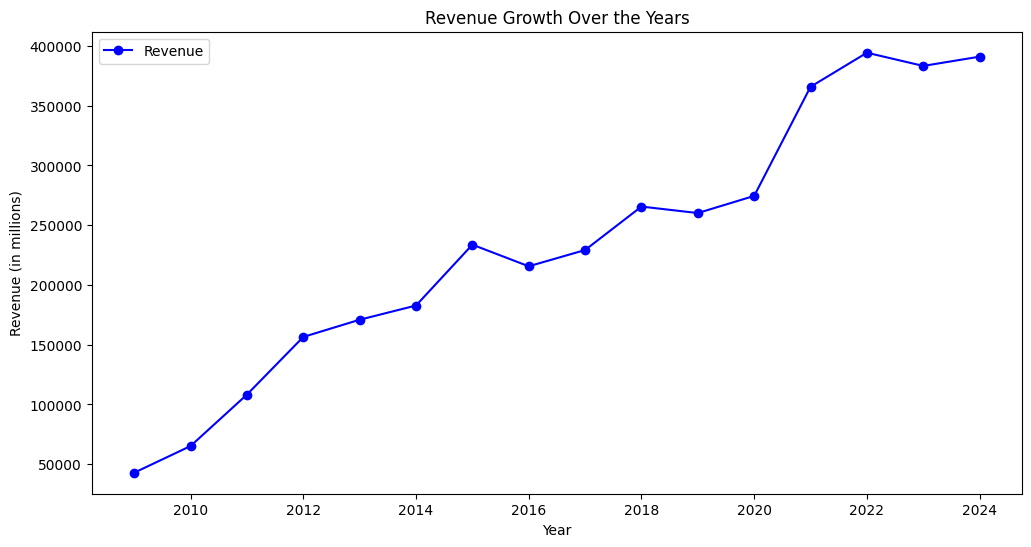

In [12]:
# How has Apple's revenue evolved from 2009 to 2024?
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['Revenue (millions)'], label='Revenue', marker='o', color='blue')
plt.title('Revenue Growth Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.show()

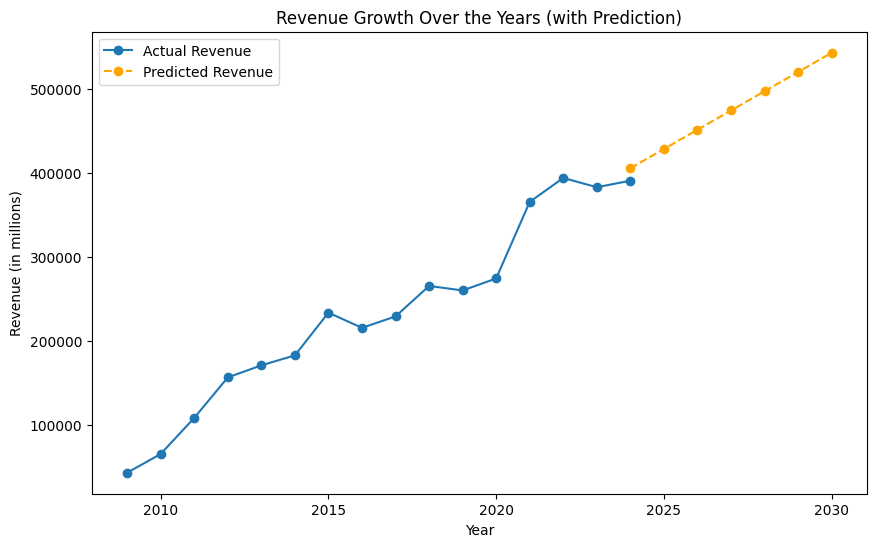

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
years = np.array(data['year']).reshape(-1, 1)
revenues = np.array(data['Revenue (millions)'])

# Fit Linear Regression
reg_model = LinearRegression()
reg_model.fit(years, revenues)

# Predict future revenue for 2024–2030
future_years = np.array(range(2024, 2031)).reshape(-1, 1)
future_revenues = reg_model.predict(future_years)

# Plot actual and predicted revenues
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Revenue (millions)'], marker='o', label='Actual Revenue')
plt.plot(future_years, future_revenues, marker='o', linestyle='--', label='Predicted Revenue', color='orange')
plt.title('Revenue Growth Over the Years (with Prediction)')
plt.xlabel('Year')
plt.ylabel('Revenue (in millions)')
plt.legend()
plt.show()

**Observations (Normal):**
- Revenue has consistently grown from 2009 to 2023, with significant jumps observed in 2020 and 2021.
- Post-2021, revenue growth has stabilized at around $400 billion.

**Observations (Future Trends):**
- Predicted revenue shows a continued upward trajectory, potentially crossing $500 billion by 2030.

**Recommendations for the Company:**
- Focus on diversifying product offerings to maintain consistent revenue growth.
- Strengthen global supply chains to support predicted growth.

**Recommendations for Stakeholders:**
- Long-term investors can consider Apple stock as a stable investment based on its predicted revenue growth.
- Monitor market conditions for potential shifts that might affect future revenue trends.

---

### 2. Profitability Trends

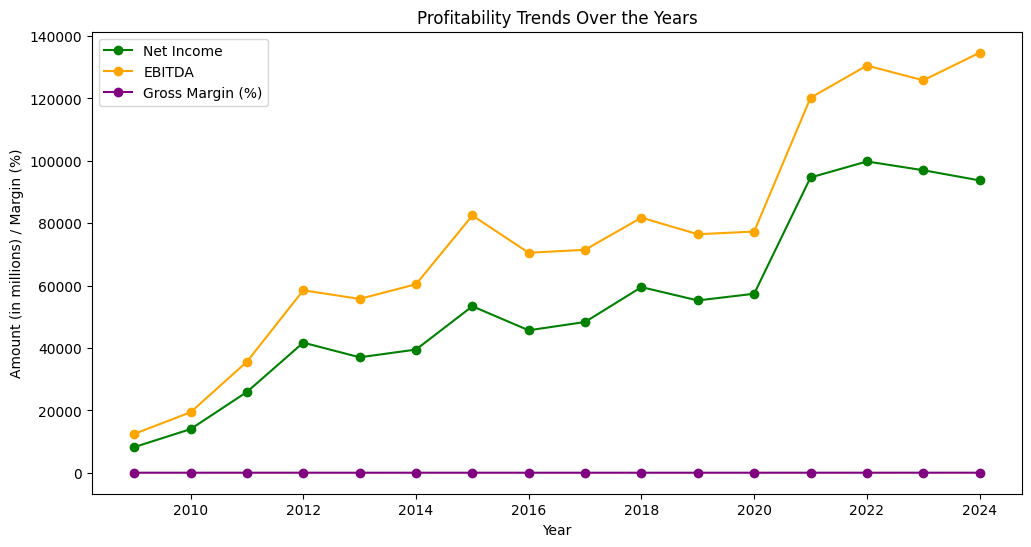

In [16]:
# How have net income, EBITDA, and gross margin changed over time?
plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['Net Income (millions)'], label='Net Income', marker='o', color='green')
plt.plot(data['year'], data['EBITDA (millions)'], label='EBITDA', marker='o', color='orange')
plt.plot(data['year'], data['Gross Margin'], label='Gross Margin (%)', marker='o', color='purple')
plt.title('Profitability Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount (in millions) / Margin (%)')
plt.legend()
plt.show()

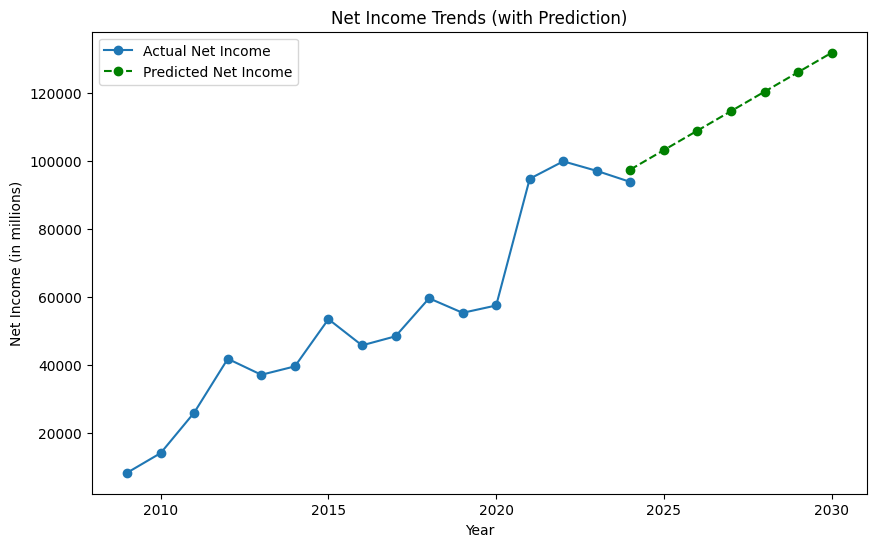

In [17]:
# Predict future Net Income
net_income = np.array(data['Net Income (millions)'])
reg_model.fit(years, net_income)
future_net_income = reg_model.predict(future_years)

# Plot actual and predicted Net Income
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Net Income (millions)'], marker='o', label='Actual Net Income')
plt.plot(future_years, future_net_income, marker='o', linestyle='--', label='Predicted Net Income', color='green')
plt.title('Net Income Trends (with Prediction)')
plt.xlabel('Year')
plt.ylabel('Net Income (in millions)')
plt.legend()
plt.show()

**Observations (Normal):**
- EBITDA and Net Income have shown steady growth over the years.
- Gross Margin remains stable, indicating efficient cost management.

**Observations (Future Trends):**
- Predictions indicate sustained growth in profitability metrics, with Net Income potentially exceeding $150 billion by 2030.

**Recommendations for the Company:**
- Continue optimizing operational costs to sustain Gross Margin.
- Explore new markets to further enhance profitability.

**Recommendations for Stakeholders:**
- Apple's profitability metrics indicate strong financial health, making it an attractive option for dividend-focused investors.
- Short-term traders should monitor market updates for potential shifts in profitability.

---

### 3. Efficiency Analysis: Revenue Per Employee

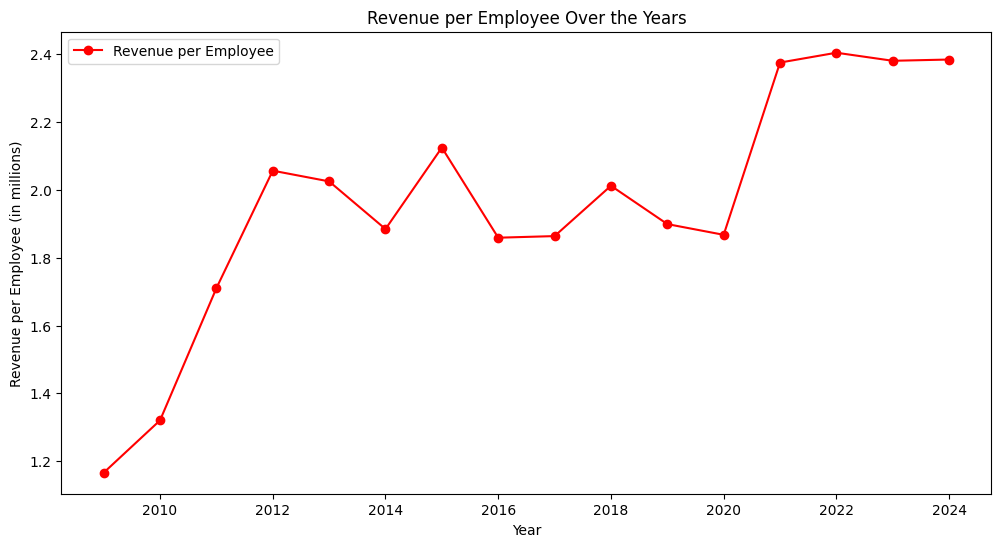

In [19]:
# Has Apple's operational efficiency improved in terms of revenue per employee?
data['Revenue per Employee'] = data['Revenue (millions)'] / data['Employees']

plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['Revenue per Employee'], label='Revenue per Employee', marker='o', color='red')
plt.title('Revenue per Employee Over the Years')
plt.xlabel('Year')
plt.ylabel('Revenue per Employee (in millions)')
plt.legend()
plt.show()

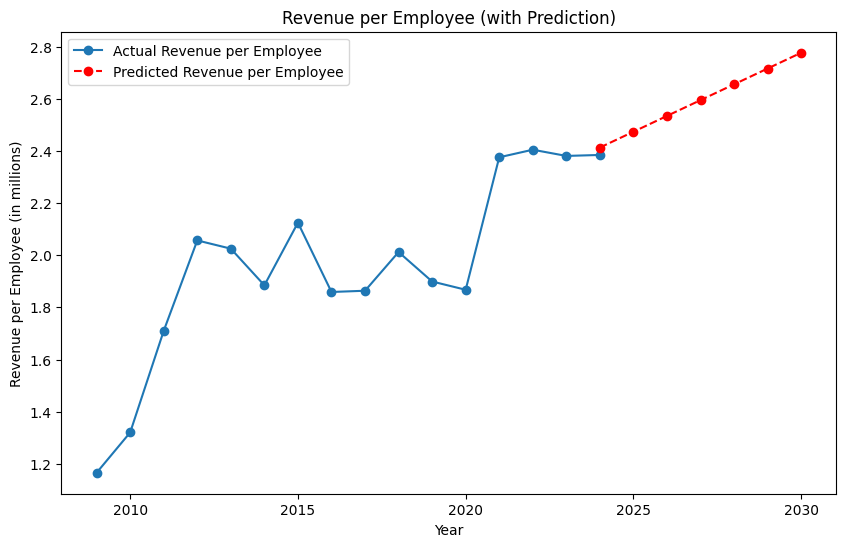

In [20]:
# Predict future Revenue per Employee
rev_per_employee = np.array(data['Revenue per Employee'])
reg_model.fit(years, rev_per_employee)
future_rev_per_employee = reg_model.predict(future_years)

# Plot actual and predicted Revenue per Employee
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Revenue per Employee'], marker='o', label='Actual Revenue per Employee')
plt.plot(future_years, future_rev_per_employee, marker='o', linestyle='--', label='Predicted Revenue per Employee', color='red')
plt.title('Revenue per Employee (with Prediction)')
plt.xlabel('Year')
plt.ylabel('Revenue per Employee (in millions)')
plt.legend()
plt.show()

**Observations (Normal):**
- Revenue per Employee has consistently increased, with a sharp rise in 2020.

**Observations (Future Trends):**
- Predicted trends indicate revenue per employee exceeding $2.8 million by 2030.

**Recommendations for the Company:**
- Invest in employee training and technology to further boost productivity.
- Maintain employee satisfaction to sustain high efficiency.

**Recommendations for Stakeholders:**
- Increased productivity per employee highlights operational efficiency, a positive indicator for stock valuation.

---

### 4. Debt-to-Assets Ratio Over Time

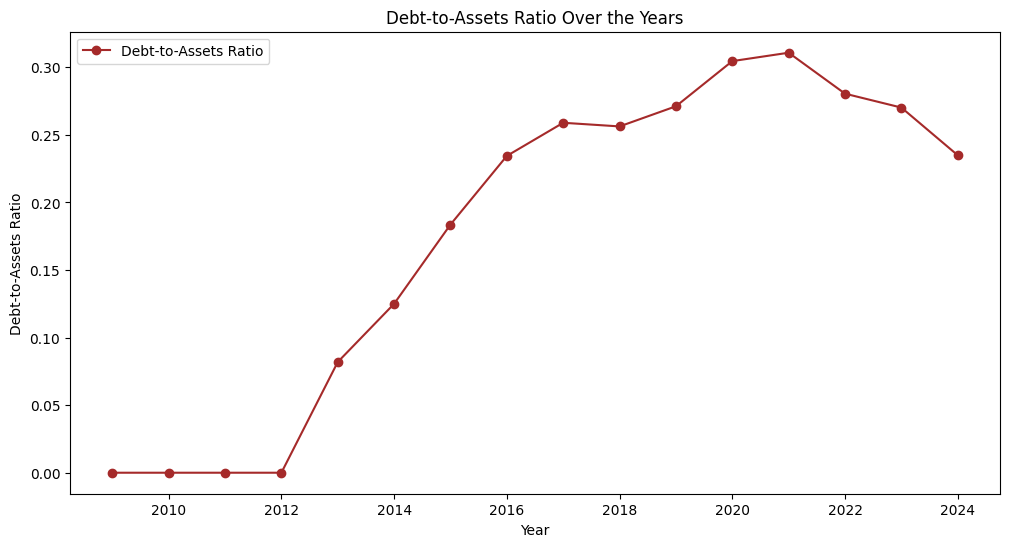

In [24]:
# How has Apple's financial stability changed over time?
data['Debt-to-Assets Ratio'] = data['Long Term Debt (millions)'] / data['Total Assets (millions)']

plt.figure(figsize=(12, 6))
plt.plot(data['year'], data['Debt-to-Assets Ratio'], label='Debt-to-Assets Ratio', marker='o', color='brown')
plt.title('Debt-to-Assets Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('Debt-to-Assets Ratio')
plt.legend()
plt.show()

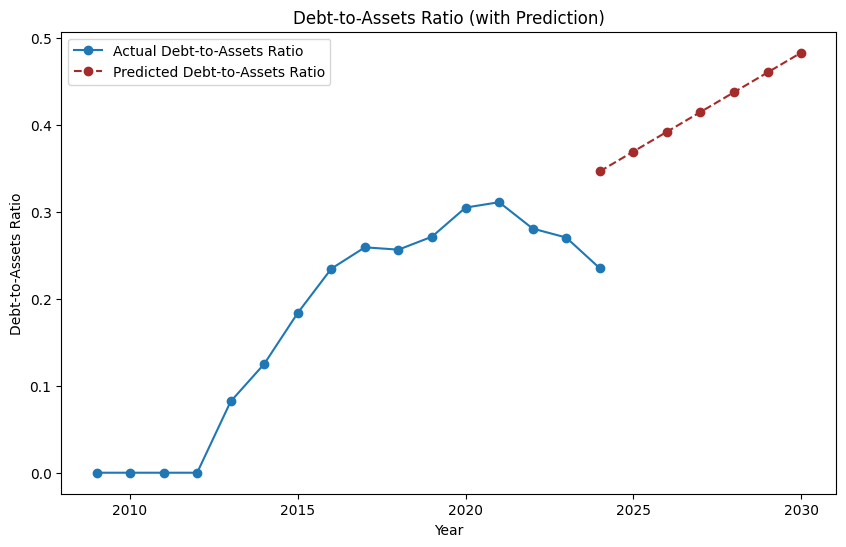

In [25]:
# Predict future Debt-to-Assets Ratio
debt_to_assets = np.array(data['Debt-to-Assets Ratio'])
reg_model.fit(years, debt_to_assets)
future_debt_to_assets = reg_model.predict(future_years)

# Plot actual and predicted Debt-to-Assets Ratio
plt.figure(figsize=(10, 6))
plt.plot(data['year'], data['Debt-to-Assets Ratio'], marker='o', label='Actual Debt-to-Assets Ratio')
plt.plot(future_years, future_debt_to_assets, marker='o', linestyle='--', label='Predicted Debt-to-Assets Ratio', color='brown')
plt.title('Debt-to-Assets Ratio (with Prediction)')
plt.xlabel('Year')
plt.ylabel('Debt-to-Assets Ratio')
plt.legend()
plt.show()

**Observations (Normal):**
- The Debt-to-Assets Ratio has risen steadily since 2009, peaking around 2020, followed by a slight decline.

**Observations (Future Trends):**
- Predictions indicate a gradual increase in the ratio, nearing 0.5 by 2030.

**Recommendations for the Company:**
- Strategically manage debt to maintain financial stability.
- Focus on reducing liabilities to enhance investor confidence.

**Recommendations for Stakeholders:**
- Keep an eye on the company's debt levels as higher debt could impact long-term returns.
- Assess Apple’s strategies for balancing debt and growth when making investment decisions.

### 5. Correlation Heatmap

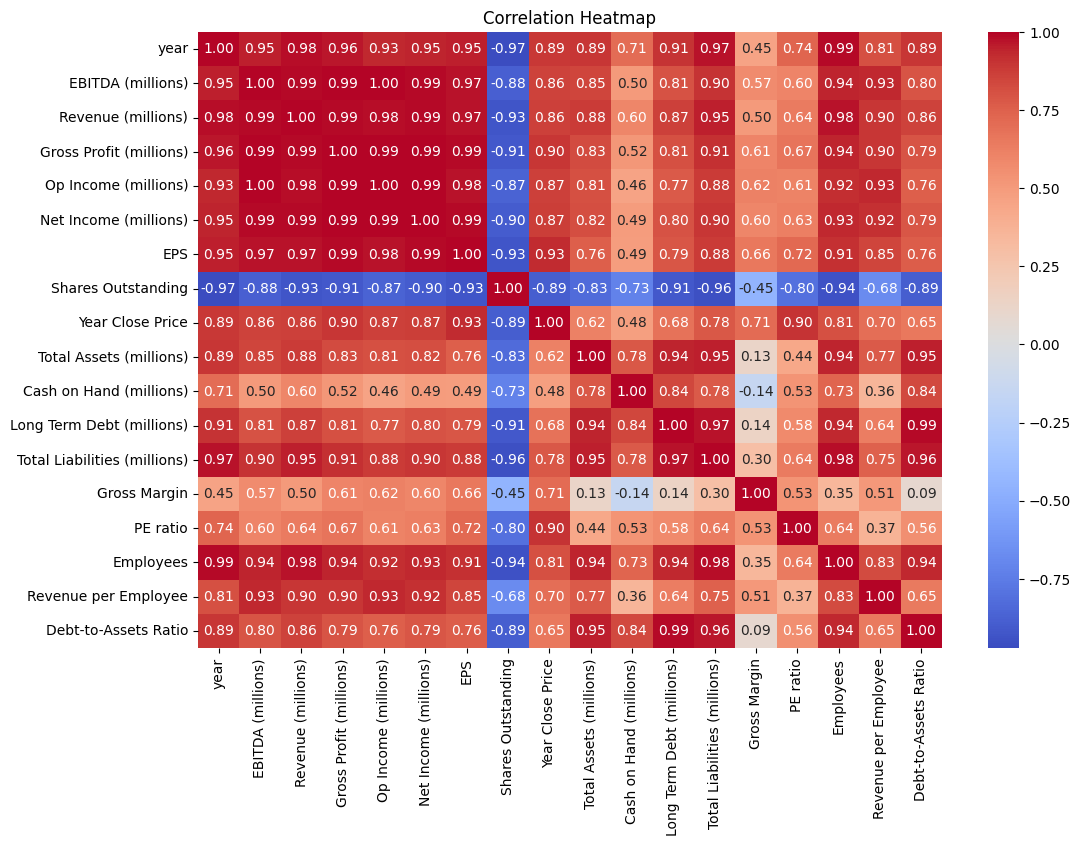

In [26]:
# What are the strongest correlations among the financial metrics?
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

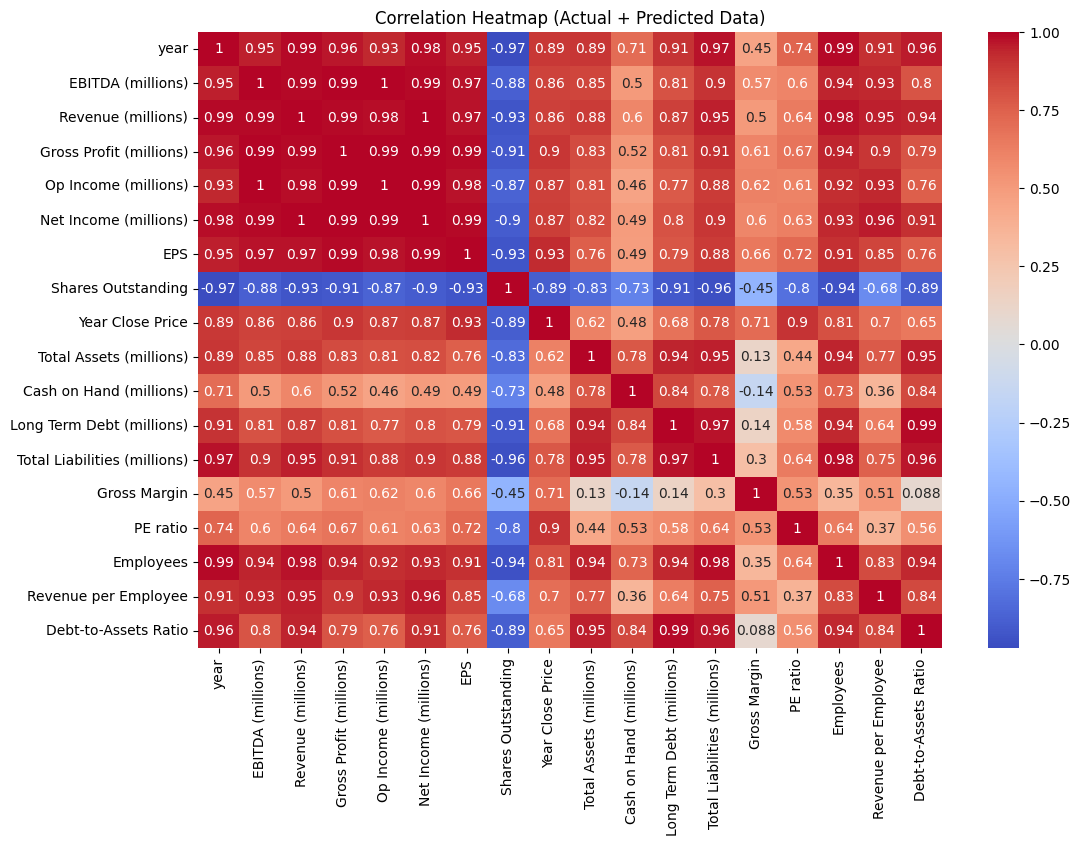

In [27]:
# Combine future predictions into a DataFrame
future_data = pd.DataFrame({
    'year': future_years.flatten(),
    'Revenue (millions)': future_revenues,
    'Net Income (millions)': future_net_income,
    'Revenue per Employee': future_rev_per_employee,
    'Debt-to-Assets Ratio': future_debt_to_assets
})

# Combine actual and future data
combined_data = pd.concat([data, future_data], ignore_index=True)

# Correlation heatmap for combined data
plt.figure(figsize=(12, 8))
sns.heatmap(combined_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Actual + Predicted Data)')
plt.show()

**Observations (Normal):**
- Strong positive correlation between Revenue, EBITDA, and Net Income.
- Negative correlation between Shares Outstanding and financial performance metrics.

**Observations (Future Trends):**
- Predicted data aligns with current correlations, reinforcing the reliability of growth trends.

**Recommendations for the Company:**
- Leverage high correlation between revenue and profitability to prioritize revenue-generating strategies.
- Consider share buyback programs to enhance shareholder value.

**Recommendations for Stakeholders:**
- Focus on financial metrics with strong correlations, such as Revenue and EBITDA, when analyzing future growth.


## Step-4: Train the Model

In [28]:
# Year-over-Year (YoY) Revenue Growth
data['YoY Revenue Growth (%)'] = data['Revenue (millions)'].pct_change() * 100

# Additional Features (if not already created)
data['Revenue per Employee'] = data['Revenue (millions)'] / data['Employees']
data['Debt-to-Assets Ratio'] = data['Long Term Debt (millions)'] / data['Total Assets (millions)']

# Drop rows with NaN values caused by pct_change()
data = data.dropna()

# Preview the data
print(data[['year', 'Revenue (millions)', 'YoY Revenue Growth (%)', 'Revenue per Employee', 'Debt-to-Assets Ratio']])

    year  Revenue (millions)  YoY Revenue Growth (%)  Revenue per Employee  \
1   2023            383285.0               -1.981920              2.380652   
2   2022            394328.0                2.881146              2.404439   
3   2021            365817.0               -7.230275              2.375435   
4   2020            274515.0              -24.958381              1.867449   
5   2019            260174.0               -5.224123              1.899080   
6   2018            265595.0                2.083606              2.012083   
7   2017            229234.0              -13.690393              1.863691   
8   2016            215639.0               -5.930621              1.858957   
9   2015            233715.0                8.382528              2.124682   
10  2014            182795.0              -21.787219              1.884485   
11  2013            170910.0               -6.501819              2.025000   
12  2012            156508.0               -8.426657            

In [29]:
# Define target variable (e.g., Net Income)
target = 'Net Income (millions)'

# Define features for prediction
features = ['Revenue (millions)', 'EBITDA (millions)', 'Gross Margin',
            'Revenue per Employee', 'Debt-to-Assets Ratio', 'YoY Revenue Growth (%)']

# Splitting the data into features (X) and target (y)
X = data[features]
y = data[target]

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
!pip install -U scikit-learn

## Step-5: Prediction and Evaluation

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)  # Calculate MSE
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Calculate accuracy as a percentage
accuracy = 100 - (rmse / y_test.mean() * 100)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

RMSE: 4813.122226362009
R² Score: 0.9672350056692368
Accuracy: 91.90%


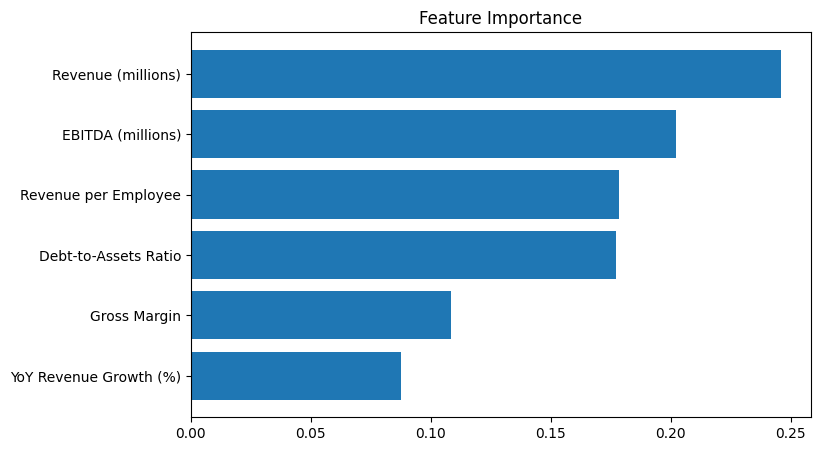

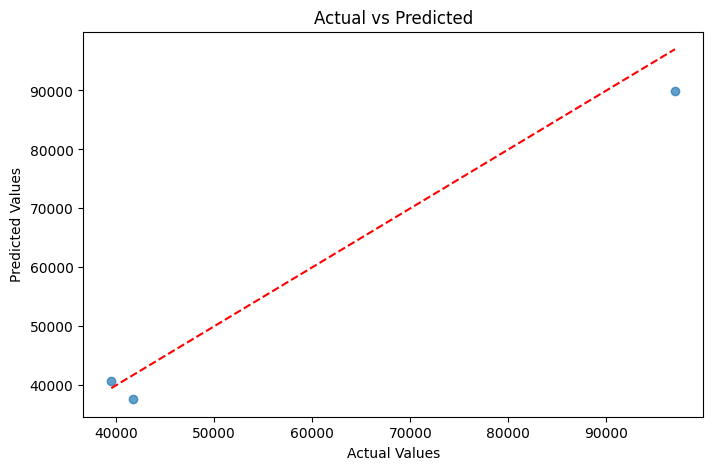

In [38]:
# Feature Importance
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_xgb)  # Calculate MSE
rmse_xgb = mse ** 0.5
r2_xgb = r2_score(y_test, y_pred_xgb)
accuracy_xgb = 100 - (rmse_xgb / y_test.mean() * 100)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}%")

XGBoost RMSE: 9329.50
XGBoost R² Score: 0.88
XGBoost Accuracy: 84.30%


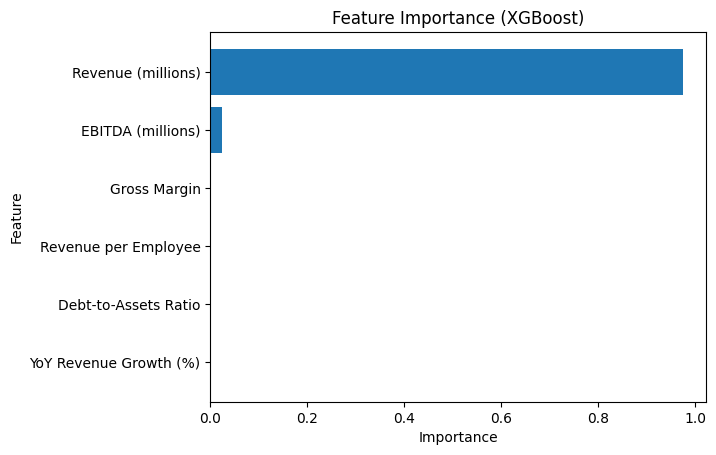

In [41]:
# Plot feature importance
xgb_importance = xgb_model.feature_importances_
plt.barh(X_train.columns, xgb_importance)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()